In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
# load cam 1 excels
path_fc = r'/home/merge/merge/fc72'

df_allsens = pd.read_csv(path_fc+'/loadcell.csv', index_col=None, header=0)
df_allsens

NameError: name 'pd' is not defined

In [1]:
df_loads = df_allsens.filter(regex=('(Time)|(State)|Loadcell*'))
arr_cells = ['Loadcell 1', 'Loadcell 2', 'Loadcell 3', 'Loadcell 4', 'Loadcell 5', 'Loadcell 6']

plt.figure(figsize=(10,8))
for cell in arr_cells:
    plt.plot(df_loads['Time'], df_loads[cell], label=cell)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Load Cell Units???")


NameError: name 'df_allsens' is not defined

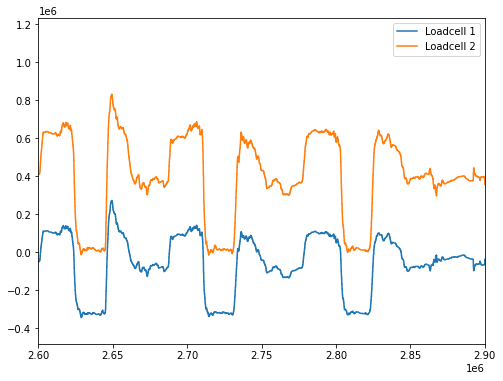

In [5]:
plt.figure(figsize=(8,6))
plt.plot(df_loads["Time"], df_loads["Loadcell 1"], label="Loadcell 1")
plt.plot(df_loads["Time"], df_loads["Loadcell 2"], label="Loadcell 2")
plt.xlim(2.6e6,2.9e6)
plt.legend()

In [10]:
df_parab1 = df_loads[ (df_loads["Time"] > 1e6) & (df_loads["Time"] < 1.2e6) 
                     & (df_loads['State'] =='10sec')]
df_parab2 = df_loads[ (df_loads["Time"] > 1.2e6) & (df_loads["Time"] < 1.285e6)
                    & (df_loads['State'] =='14sec')]

df_parab3 = df_loads[ (df_loads["Time"] > 1.295e6) & (df_loads["Time"] < 1.4e6) 
                    & (df_loads['State'] =='14sec')]

df_parab4 = df_loads[ (df_loads["Time"] > 1.6e6) & (df_loads["Time"] < 1.72e6) 
                    & (df_loads['State'] =='7sec')]

df_parab5 = df_loads[ (df_loads["Time"] > 1.72e6) & (df_loads["Time"] < 1.8e6) 
                    & (df_loads['State'] =='7sec')]

df_parab6 = df_loads[ (df_loads["Time"] > 1.8e6) & (df_loads["Time"] < 1.875e6) 
                    & (df_loads['State'] =='7sec')]

df_parab7 = df_loads[ (df_loads["Time"] > 1.875e6) & (df_loads["Time"] < 1.96e6) 
                     & (df_loads['State'] =='10sec')]

df_parab8 = df_loads[ (df_loads["Time"] > 1.96e6) & (df_loads["Time"] < 2.04e6 )
                     & (df_loads['State'] =='10sec')]

df_parab9 = df_loads[ (df_loads["Time"] > 2.04e6) & (df_loads["Time"] < 2.14e6 )
                     & (df_loads['State'] =='10sec')]

df_parab10 = df_loads[ (df_loads["Time"] > 2.3e6) & (df_loads["Time"] < 2.44e6 )
                    & (df_loads['State'] =='14sec')]

df_parab11 = df_loads[ (df_loads["Time"] > 2.44e6) & (df_loads["Time"] < 2.53e6 )
                    & (df_loads['State'] =='14sec')]
df_parab12 = df_loads[ (df_loads["Time"] > 2.53e6) & (df_loads["Time"] < 2.6e6 )
                    & (df_loads['State'] =='8sec')]

df_parab13 = df_loads[ (df_loads["Time"] > 2.6e6) & (df_loads["Time"] < 2.68e6 )
                    & (df_loads['State'] =='10sec')]

df_parab14 = df_loads[ (df_loads["Time"] > 2.68e6) & (df_loads["Time"] < 2.76e6 )
                    & (df_loads['State'] =='5sec')]

df_parab15 = df_loads[ (df_loads["Time"] > 2.76e6) & (df_loads["Time"] < 2.86e6 )
                    & (df_loads['State'] =='5sec')]


In [11]:
h = 16.192    #chamber height

cam_list = []
for i in range(1,4):
    cam_list = np.append(cam_list, np.full((1,15),[i]))

parab_list=[]
i=1
while i <= 3:
    for j in range(1,16):
        parab_list = np.append(parab_list, j)
    i+=1

    
## adds extra columns saying max height 

parab_list = [df_parab1,df_parab2,df_parab3,df_parab4, df_parab5,df_parab6, df_parab7, df_parab8, df_parab9, 
              df_parab10, df_parab11, df_parab12, df_parab13, df_parab14, df_parab15]

def addingNab(df):
    df_masked = df.filter(regex='Slice[^78]*_Max')
    df["Nab25"] = df_masked.gt(0.25*h).sum(axis=1)
    df["Nab50"] = df_masked.gt(0.50*h).sum(axis=1)
    df["Nab75"] = df_masked.gt(0.75*h).sum(axis=1)
    df["Nab95"] = df_masked.gt(0.95*h).sum(axis=1)
    return df

for df in parab_list: 
    df = addingNab(df)

/tmp/ipykernel_2947/1398468975.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nab25"] = df_masked.gt(0.25*h).sum(axis=1)
/tmp/ipykernel_2947/1398468975.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nab50"] = df_masked.gt(0.50*h).sum(axis=1)
/tmp/ipykernel_2947/1398468975.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

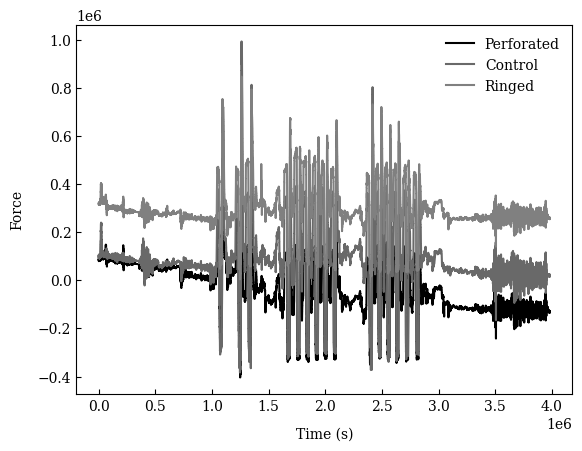

<Figure size 1280x960 with 0 Axes>

In [57]:
import matplotlib as mpl
ax = plt.gca()
# plt.rcdefaults()
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 10
ax.xaxis.set_tick_params(which='major', direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', direction='in', left='on')

plt.plot(df_loads["Time"], df_loads["Loadcell 1"], label="Perforated", color='black')
plt.plot(df_loads["Time"], df_loads["Loadcell 3"], label="Control", color='dimgrey')
plt.plot(df_loads["Time"], df_loads["Loadcell 5"], label="Ringed", color='grey')
plt.xlabel('Time (s)', labelpad=10)
plt.ylabel('Force', labelpad=10)
plt.legend(frameon=False)
plt.figure(dpi=200)
plt.savefig('fc72loadcellsssss'+'.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [36]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [1]:
plt.plot(df_loads["Time"], df_loads["Loadcell 1"], label="Loadcell 5")
plt.plot(df_loads["Time"], df_loads["Loadcell 3"], label="Loadcell 6")
plt.legend()

NameError: name 'plt' is not defined

In [58]:
df_c3p2

NameError: name 'df_c3p2' is not defined